In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
!python --version

Python 3.8.5


In [2]:
# import csv file into Pandas dataframe
covid_data = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data.csv")
type(covid_data)

/Users/hjackson/opt/anaconda3/envs/tf/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


pandas.core.frame.DataFrame

In [4]:
len(covid_data)
covid_data.shape

(20565345, 12)

In [30]:
covid_data.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,infection_t,deceased_t,recovered_t,infection_end_t
0,2020/01/01,2021/01/31,2020/01/01,NaN,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,No,Missing,0,-1,11,11
1,2020/01/01,2021/02/02,2020/01/01,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,No,Missing,0,-1,11,11
2,2020/01/02,2021/01/27,2020/01/02,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,No,Missing,1,-1,12,12
3,2020/01/02,2021/02/02,2020/01/02,NaN,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,Missing,Missing,No,Missing,1,-1,12,12
4,2021/01/01,2020/01/03,2020/01/03,2021/01/01,Laboratory-confirmed case,Male,0 - 9 Years,"White, Non-Hispanic",No,Missing,No,Yes,366,-1,377,377


In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20565345 entries, 0 to 20565344
Data columns (total 12 columns):
cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtypes: object(12)
memory usage: 1.8+ GB


In [7]:
covid_data.describe()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
count,20565345,18233264,5933794,9278464,20565345,20565330,20565268,20565337,20565345,20565345,20565345,20565345
unique,410,424,418,424,2,5,10,9,6,4,4,4
top,2020/12/31,2020/12/31,2021/01/04,2020/11/30,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
freq,277049,256387,70590,76115,18856641,10621441,3835094,8112749,9047578,16696875,10517575,16097975


In [22]:
covid_data.keys()

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt',
       'current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn', 'infection_t'],
      dtype='object')

In [15]:
# Remove space from the column name
covid_data.rename(columns={'cdc_case_earliest_dt ': 'cdc_case_earliest_dt'}, inplace=True)

In [26]:
# Replace missing and unknown values for death_yn column with 'No'
covid_data.death_yn.replace({'Missing': 'No', 'Unknown': 'No'}, inplace=True)

In [27]:
covid_data.death_yn.unique()

array(['No', 'Yes'], dtype=object)

In [32]:
# pickle updated dataframe
covid_data.to_pickle('cdc_df')

In [3]:
covid_data = pd.read_pickle('cdc_df')

In [5]:
unique_ages = covid_data.age_group.unique()
print(unique_ages)

['0 - 9 Years' '10 - 19 Years' '20 - 29 Years' '60 - 69 Years'
 '70 - 79 Years' '40 - 49 Years' '50 - 59 Years' '80+ Years'
 '30 - 39 Years' 'Missing' nan]


In [8]:
# Get uniques dates and sort them in ascending order
unique_dates = covid_data.cdc_case_earliest_dt.unique()
unique_dates.sort()
print(unique_dates)

['2020/01/01' '2020/01/02' '2020/01/03' '2020/01/04' '2020/01/05'
 '2020/01/06' '2020/01/07' '2020/01/08' '2020/01/09' '2020/01/10'
 '2020/01/11' '2020/01/12' '2020/01/13' '2020/01/14' '2020/01/15'
 '2020/01/16' '2020/01/17' '2020/01/18' '2020/01/19' '2020/01/20'
 '2020/01/21' '2020/01/22' '2020/01/23' '2020/01/24' '2020/01/25'
 '2020/01/26' '2020/01/27' '2020/01/28' '2020/01/29' '2020/01/30'
 '2020/01/31' '2020/02/01' '2020/02/02' '2020/02/03' '2020/02/04'
 '2020/02/05' '2020/02/06' '2020/02/07' '2020/02/08' '2020/02/09'
 '2020/02/10' '2020/02/11' '2020/02/12' '2020/02/13' '2020/02/14'
 '2020/02/15' '2020/02/16' '2020/02/17' '2020/02/18' '2020/02/19'
 '2020/02/20' '2020/02/21' '2020/02/22' '2020/02/23' '2020/02/24'
 '2020/02/25' '2020/02/26' '2020/02/27' '2020/02/28' '2020/02/29'
 '2020/03/01' '2020/03/02' '2020/03/03' '2020/03/04' '2020/03/05'
 '2020/03/06' '2020/03/07' '2020/03/08' '2020/03/09' '2020/03/10'
 '2020/03/11' '2020/03/12' '2020/03/13' '2020/03/14' '2020/03/15'
 '2020/03/

In [9]:
# Map of dates to t value
date_to_index = {}
for i in range(len(unique_dates)):
    date_to_index[unique_dates[i]] = i

In [10]:
date_to_index['2021/02/09']

405

In [18]:
array_of_ints = [i for i in range(410)]

In [6]:
# initialize arrays for number in state at each time t
susceptible = [0] * 410
infected = [0] * 410
recovered = [0] * 410
deceased = [0] * 410

In [24]:
severe = 19
mild = 11

In [13]:
covid_data["infection_t"] = covid_data['cdc_case_earliest_dt'].map(date_to_index)

In [25]:
covid_data["deceased_t"] = covid_data.apply(lambda x: x['infection_t'] + severe if x['death_yn'] == 'Yes' else -1, axis=1)

In [27]:
covid_data["recovered_t"] = covid_data.apply(lambda x: x['infection_t'] + mild if x['death_yn'] == 'No' else -1, axis=1)

In [29]:
covid_data["infection_end_t"] = covid_data[["deceased_t", "recovered_t"]].max(axis=1)

In [45]:
len(state_by_day)

166606

In [9]:
# def soc_iter(TEAM,home,away,ftr):
#     df['Draws'] = 'No_Game'
#     df.loc[((home == TEAM) & (ftr == 'D')) | ((away == TEAM) & (ftr == 'D')), 'Draws'] = 'Draw'
#     df.loc[((home == TEAM) & (ftr != 'D')) | ((away == TEAM) & (ftr != 'D')), 'Draws'] = 'No_Draw'

details = details.apply(lambda x : True
            if x['College'] == "Geu" else False, axis = 1)
  
# Count number of True in the series
num_rows = len(details[details == True].index)

# function for mapping each row of covid data to the states_by_day dataframe
def get_counts_of_S_at_t(t):
    len(covid_data[(date_to_index[covid_data['cdc_case_earliest_dt']] > t)])
    counts = covid_data.apply(lambda x : True if covid)

In [18]:
# Construct number of susceptible at time t
for i in range(len(susceptible)):
    susceptible[i] = len(covid_data[covid_data['infection_t'] > i])
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [33]:
# Construct number of infected at time t
for i in range(len(infected)):
    recover = i + mild
    die = i + severe
    infected[i] = len(covid_data[(covid_data['infection_t'] <= i) & (covid_data['infection_end_t'] > i)])
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [35]:
# Construct number of recovered at time t
for i in range(len(recovered)):
    recovered[i] = len(covid_data[(covid_data['recovered_t'] >= 0) & (covid_data['recovered_t'] <= i)])
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [37]:
# Construct number of recovered at time t
for i in range(len(deceased)):
    deceased[i] = len(covid_data[(covid_data['deceased_t'] >= 0) & (covid_data['deceased_t'] <= i)])
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400


In [44]:
states = [susceptible, infected, recovered, deceased]
state_counts_by_day = pd.DataFrame(states)

In [99]:
state_counts_by_day.head()

,S,I,R,D
0,0.999999,8.050600e-07,0.0,0.0
1,0.999999,1.403539e-06,0.0,0.0
2,0.999998,1.892651e-06,0.0,0.0
3,0.999997,2.916444e-06,0.0,0.0
4,0.999996,3.627327e-06,0.0,0.0


In [54]:
state_counts_by_day['S'] = state_counts_by_day['S'].add(329168006 - len(covid_data))

In [89]:
state_counts_by_day = state_counts_by_day/329168006

<Figure size 700x700 with 0 Axes>

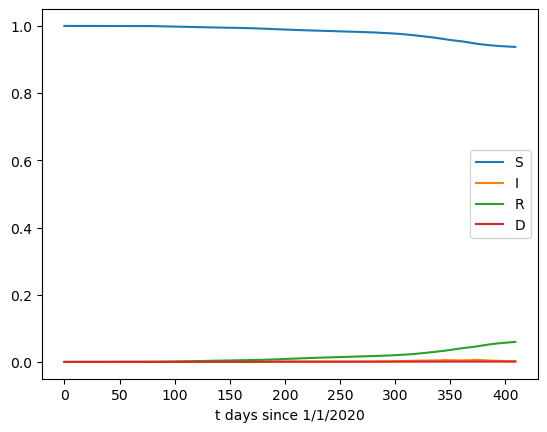

<Figure size 700x700 with 0 Axes>

In [120]:
plt.plot(state_counts_by_day['S'], label="S")
plt.plot(state_counts_by_day['I'], label="I")
plt.plot(state_counts_by_day['R'], label="R")
plt.plot(state_counts_by_day['D'], label="D")
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))

<Figure size 700x700 with 0 Axes>

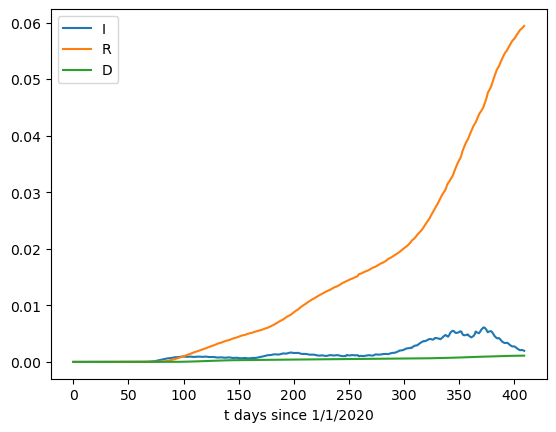

<Figure size 700x700 with 0 Axes>

In [121]:
plt.plot(state_counts_by_day['I'], label="I")
plt.plot(state_counts_by_day['R'], label="R")
plt.plot(state_counts_by_day['D'], label="D")
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))

<Figure size 700x700 with 0 Axes>

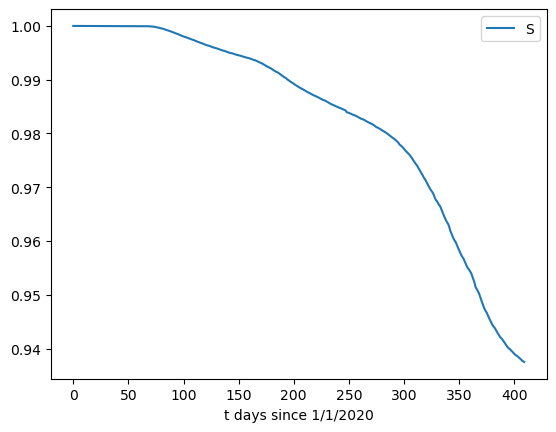

<Figure size 700x700 with 0 Axes>

In [122]:
plt.plot(state_counts_by_day['S'], label="S")
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))

In [58]:
state_counts_by_day.to_pickle('sird_df')


In [4]:
state_counts_by_day = pd.read_pickle('sird_df')


In [5]:
s_array = state_counts_by_day.loc[:,'S']
i_array = state_counts_by_day.loc[:,'I']
r_array = state_counts_by_day.loc[:,'R']

In [6]:
d_array = state_counts_by_day.loc[:,'D']

In [13]:
s_array[0]

329167741

In [7]:
def params_at_t(s, i, r, k):
    M = np.array([[-s[k-1]*i[k-1], 0, 0],
              [s[k-1]*i[k-1], -i[k-1], -i[k-1]],
              [0, i[k-1], 0]])
    dots = np.array([[s[k]-s[k-1]],
                    [i[k]-i[k-1]],
                    [r[k]-r[k-1]]])
    M = np.linalg.inv(M)
    params = M.dot(dots)
    return params[0][0], params[1][0], params[2][0]

In [8]:
betas = []
gammas = []
deltas = []

for t in range(1, len(s_array)):
    b, g, d = params_at_t(s_array, i_array, r_array, t)
    betas.append(b)
    gammas.append(g)
    deltas.append(d)

In [9]:
def mse_of_arrays(array1, array2):
    diff = np.subtract(array1, array2)
    square = np.power(diff, 2)
    return np.average(square)

def mse_of_params_at_t(b, g, delta, s, i, r, d, k):
    s_new = [s[0]]
    i_new = [i[0]]
    r_new = [r[0]]
    d_new = [d[0]]
    mse_array = []
    for i in range(1, len(s)):
        s_next = s_new[i-1] - b*s_new[i-1]*i_new[i-1]
        i_next = i_new[i-1] + b*s_new[i-1]*i_new[i-1] - g*i_new[i-1] - delta*i_new[i-1]
        r_next = r_new[i-1] + g*i_new[i-1]
        d_next = d_new[i-1] + delta*i_new[i-1]
        s_new.append(s_next)
        i_new.append(i_next)
        r_new.append(r_next)
        d_new.append(d_next)
    mse_array.append(mse_of_arrays(s, s_new))
    mse_array.append(mse_of_arrays(i, i_new))
    mse_array.append(mse_of_arrays(r, r_new))
    mse_array.append(mse_of_arrays(d, d_new))
    return np.average(mse_array)

In [10]:
mse_values = []
for i in range(len(s_array)-1):
    this_mse = mse_of_params_at_t(betas[i], gammas[i], deltas[i], s_array, i_array, r_array, d_array, i)
    mse_values.append(this_mse)

In [11]:
np.argmin(mse_values)


277

In [12]:
print("The values at 277 are: beta {}, gamma {}, delta {}".format(betas[277], gammas[277], deltas[277]))



The values at 277 are: beta 3.2431585128849923e-10, gamma 0.07951436225486924, delta 0.001203607485723554


In [24]:
def simulate_params(b, g, delta, s_0, i_0, r_0, d_0, t_max):
    s_new = [s_0]
    i_new = [i_0]
    r_new = [r_0]
    d_new = [d_0]
    for i in range(1, t_max):
        s_next = s_new[i-1] - b*s_new[i-1]*i_new[i-1]
        i_next = i_new[i-1] + b*s_new[i-1]*i_new[i-1] - g*i_new[i-1] - delta*i_new[i-1]
        r_next = r_new[i-1] + g*i_new[i-1]
        d_next = d_new[i-1] + delta*i_new[i-1]
        s_new.append(s_next)
        i_new.append(i_next)
        r_new.append(r_next)
        d_new.append(d_next)
    return s_new, i_new, r_new, d_new

In [29]:
s_simulated, i_simulated, r_simulated, d_simulated = simulate_params(betas[277], gammas[277], deltas[277], s_array[0], i_array[0], r_array[0], d_array[0], 10000)

<Figure size 504x504 with 0 Axes>

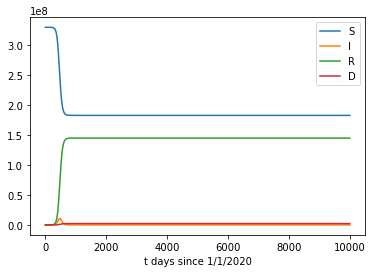

<Figure size 504x504 with 0 Axes>

In [30]:
plt.plot(s_simulated, label="S")
plt.plot(i_simulated, label="I")
plt.plot(r_simulated, label="R")
plt.plot(d_simulated, label="D")
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))

In [31]:
s_simulated[2000]

182386243.03023988

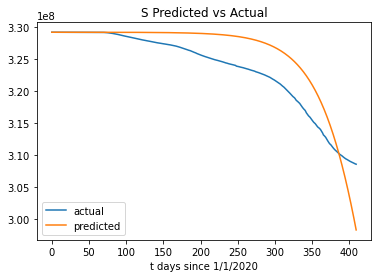

<Figure size 504x504 with 0 Axes>

In [17]:
plt.plot(s_array, label="actual")
plt.plot(s_simulated, label="predicted")
plt.title('S Predicted vs Actual')
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))
plt.show()

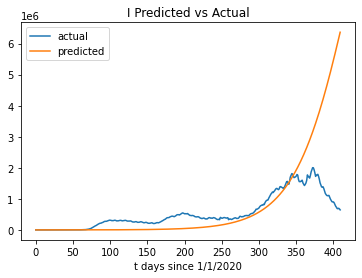

<Figure size 504x504 with 0 Axes>

In [19]:
plt.plot(i_array, label="actual")
plt.plot(i_simulated, label="predicted")
plt.title('I Predicted vs Actual')
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))
plt.show()

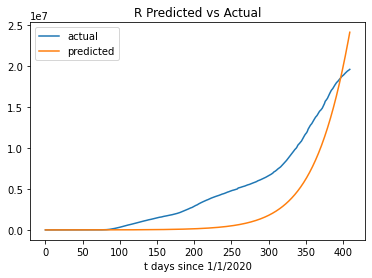

<Figure size 504x504 with 0 Axes>

In [20]:
plt.plot(r_array, label="actual")
plt.plot(r_simulated, label="predicted")
plt.title('R Predicted vs Actual')
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))
plt.show()

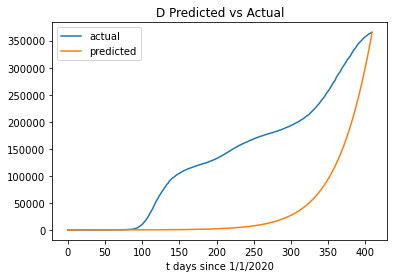

<Figure size 504x504 with 0 Axes>

In [21]:
plt.plot(d_array, label="actual")
plt.plot(d_simulated, label="predicted")
plt.title('D Predicted vs Actual')
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))
plt.show()

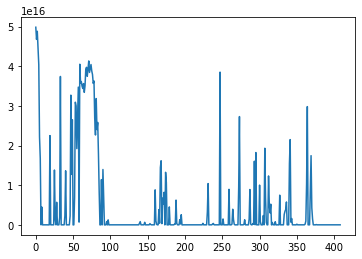

In [12]:
plt.plot(mse_values)
plt.show()

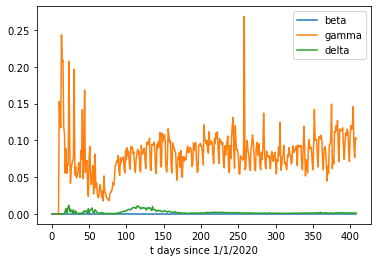

<Figure size 504x504 with 0 Axes>

In [6]:
plt.plot(betas, label="beta")
plt.plot(gammas, label="gamma")
plt.plot(deltas, label="delta")
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))
plt.show()

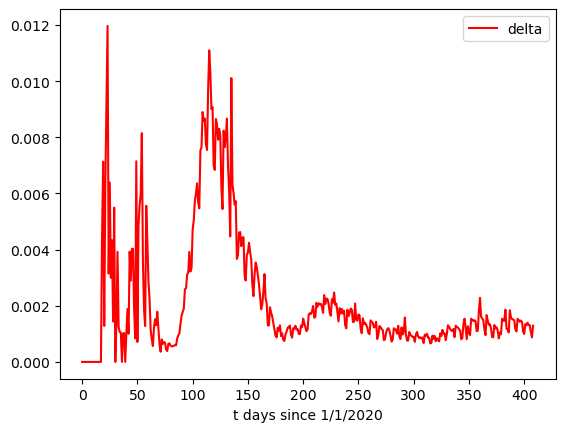

<Figure size 700x700 with 0 Axes>

In [130]:
plt.plot(deltas, "r-", label="delta")
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))
plt.show()

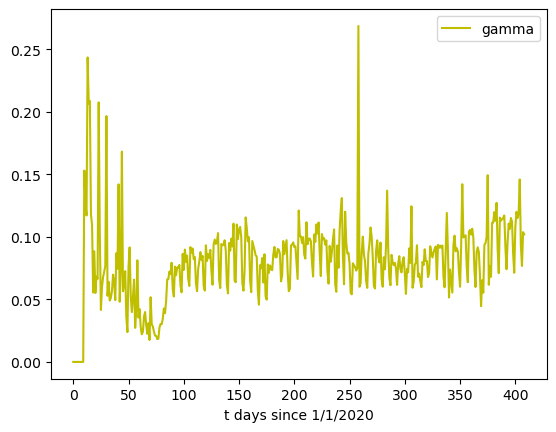

<Figure size 700x700 with 0 Axes>

In [131]:
plt.plot(gammas, "y-", label="gamma")
plt.legend()
plt.xlabel('t days since 1/1/2020')
plt.figure(figsize=(7, 7))
plt.show()

In [132]:
for t in range(len(gammas)):
    converge_criteria = -gammas[t] - deltas[t]
    if converge_criteria >= 0:
        print(unique_dates[t])

2020/01/03
2020/01/05
2020/01/06
2020/01/08
